In [2]:
import pandas as pd
import numpy as np
import os
import skimage.io as io
import matplotlib.pyplot as plt
import cv2
from keras.models import load_model
import re
from keras import models

In [2]:
#dataset_creato_da_noi
#final_segnali_stradali

In [5]:
df = pd.read_csv(r'C:\Users\Giobi\OneDrive - Universita degli Studi di Milano-Bicocca\Digital Signal and Image Management\Progetto Segnali Stradali\final_segnali_stradali.csv', sep = ';')

In [8]:
multi_task = load_model(r'C:\Users\Giobi\OneDrive - Universita degli Studi di Milano-Bicocca\Digital Signal and Image Management\Progetto Segnali Stradali\models/multi-task-sigopt.h5') #load_model('models/multi_task.h5')
multi_task.load_weights(r'C:\Users\Giobi\OneDrive - Universita degli Studi di Milano-Bicocca\Digital Signal and Image Management\Progetto Segnali Stradali\weights/multi-task-sigopt.hdf5')
model_is_signal = load_model(r'C:\Users\Giobi\OneDrive - Universita degli Studi di Milano-Bicocca\Digital Signal and Image Management\Progetto Segnali Stradali\models/is_signal.h5')
model_is_signal.load_weights(r'C:\Users\Giobi\OneDrive - Universita degli Studi di Milano-Bicocca\Digital Signal and Image Management\Progetto Segnali Stradali\weights/model_is_signal_conv.hdf5') #load_weights('weights/model_is_signal_conv.hdf5')

In [5]:
diz = {}
arr = np.zeros([1, 40, 40, 3])
path = "dataset_classificazione_multiclasse_creato_da_noi"
Class=os.listdir(path)
conta = 0
for i in Class:
    for j in os.listdir(path + "\\" + i):
        image=io.imread(path + "\\" + i + "\\" + j)
        image = cv2.resize(image, (40, 40), interpolation=cv2.INTER_CUBIC)
        arr = np.concatenate([arr, np.expand_dims(image, axis = 0)], axis = 0)
        target = int(re.search('(^\d+)',i).group(1))
        predicted = int(np.argmax(multi_task.predict(np.expand_dims(image/255, axis = 0))[0]))
        night = False
        if j[0] == 'n':
            night = True
        is_signal = False
        if int(np.round(np.squeeze(model_is_signal.predict(np.expand_dims(image/255, axis = 0))))) == 1:
            is_signal = True
        is_correct = False
        if(target==predicted):
            is_correct = True
        red = np.squeeze(cv2.calcHist([image],[0],None,[5],[0,256]))
        green = np.squeeze(cv2.calcHist([image],[1],None,[5],[0,256]))
        blue = np.squeeze(cv2.calcHist([image],[2],None,[5],[0,256]))
        f = np.fft.fft2(image[:,:,0])
        fshift = np.fft.fftshift(f)
        spectrum_red = 20*np.log(np.abs(fshift))
        spectrum_red_hist = np.squeeze(cv2.calcHist([np.float32(spectrum_red)],[0],None,[5],[0,256]))
        f = np.fft.fft2(image[:,:,1])
        fshift = np.fft.fftshift(f)
        spectrum_green = 20*np.log(np.abs(fshift))
        spectrum_green_hist = np.squeeze(cv2.calcHist([np.float32(spectrum_green)],[0],None,[5],[0,256]))
        f = np.fft.fft2(image[:,:,2])
        fshift = np.fft.fftshift(f)
        spectrum_blue = 20*np.log(np.abs(fshift))
        spectrum_blue_hist = np.squeeze(cv2.calcHist([np.float32(spectrum_blue)],[0],None,[5],[0,256]))
        d = {}
        d['real_class'] = df[df['target'] == target]['title']
        d['real_class_target'] = target
        d['predicted_class'] = df[df['target'] == predicted]['title']
        d['predicted_is_signal'] = is_signal
        d['class_prediction_is_correct'] = is_correct
        d['night'] = night
        #d['array'] = image
        
        d['contrast_red'] = np.max(image[:,:,0])/(np.min(image[:,:,0]) + 0.001)
        d['contrast_green'] = np.max(image[:,:,1])/(np.min(image[:,:,1]) + 0.001)
        d['contrast_blue'] = np.max(image[:,:,2])/(np.min(image[:,:,2]) + 0.001)
        
        d['hist_red_0-51'] = red[0]
        d['hist_red_51-102'] = red[1]
        d['hist_red_102-153'] = red[2]
        d['hist_red_153-204'] = red[3]
        d['hist_red_204-256'] = red[4]
        d['hist_green_0-51'] = green[0]
        d['hist_green_51-102'] = green[1]
        d['hist_green_102-153'] = green[2]
        d['hist_green_153-204'] = green[3]
        d['hist_green_204-256'] = green[4]
        d['hist_blue_0-51'] = blue[0]
        d['hist_blue_51-102'] = blue[1]
        d['hist_blue_102-153'] = blue[2]
        d['hist_blue_153-204'] = blue[3]
        d['hist_blue_204-256'] = blue[4]
        d['color_mean_red'] = np.mean(arr[:,:,:,0])
        d['color_mean_green'] = np.mean(arr[:,:,:,1])
        d['color_mean_blue'] = np.mean(arr[:,:,:,2])
        d['color_std_red'] = np.std(arr[:,:,:,0])
        d['color_std_green'] = np.std(arr[:,:,:,1])
        d['color_std_blue'] = np.std(arr[:,:,:,2])
        
        d['spectrum_hist_red_0-51'] = spectrum_red_hist[0]
        d['spectrum_hist_red_51-102'] = spectrum_red_hist[1]
        d['spectrum_hist_red_102-153'] = spectrum_red_hist[2]
        d['spectrum_hist_red_153-204'] = spectrum_red_hist[3]
        d['spectrum_hist_red_204-256'] = spectrum_red_hist[4]
        d['spectrum_hist_green_0-51'] = spectrum_green_hist[0]
        d['spectrum_hist_green_51-102'] = spectrum_green_hist[1]
        d['spectrum_hist_green_102-153'] = spectrum_green_hist[2]
        d['spectrum_hist_green_153-204'] = spectrum_green_hist[3]
        d['spectrum_hist_green_204-256'] = spectrum_green_hist[4]
        d['spectrum_hist_blue_0-51'] = spectrum_blue_hist[0]
        d['spectrum_hist_blue_51-102'] = spectrum_blue_hist[1]
        d['spectrum_hist_blue_102-153'] = spectrum_blue_hist[2]
        d['spectrum_hist_blue_153-204'] = spectrum_blue_hist[3]
        d['spectrum_hist_blue_204-256'] = spectrum_blue_hist[4]        
        d['spectrum_mean_red'] = np.mean(spectrum_red)
        d['spectrum_mean_green'] = np.mean(spectrum_green)
        d['spectrum_mean_blue'] = np.mean(spectrum_blue)
        d['spectrum_std_red'] = np.std(spectrum_red)
        d['spectrum_std_green'] = np.std(spectrum_green)
        d['spectrum_std_blue'] = np.std(spectrum_blue)
        diz[conta] = d  
        conta += 1
        #d['predicted_class'] = multi_task.predict(np.expand_dims(image, axis = 0))
        #plt.imshow(image); plt.show()
        #print('i: ' + i + '\n j: ' + j + '\n image: ' + str(image.shape))
arr = arr[1:,:,:,:] #elimino la prima riga che erano tutti zeri

In [6]:
df_c = pd.DataFrame.from_dict(diz, orient = 'index')

In [7]:
accuracy = len(df_c[df_c['class_prediction_is_correct']==True])/len(df_c)
print("L'accuratezza nel problema di classificazione multiclasse è pari a: " + str(accuracy))
accuracy = len(df_c[df_c['predicted_is_signal']==True])/len(df_c)
print("L'accuratezza nel problema di classificazione binaria (c'è o non c'è il sengale) è pari a: " + str(accuracy))

L'accuratezza nel problema di classificazione multiclasse è pari a: 0.7290322580645161
L'accuratezza nel problema di classificazione binaria (c'è o non c'è il sengale) è pari a: 0.9290322580645162


## Esempi

In [8]:
#RGB
img = io.imread(r"C:\Users\Giobi\OneDrive - Universita degli Studi di Milano-Bicocca\Digital Signal and Image Management\Progetto Segnali Stradali\dataset_classificazione_multiclasse_creato_da_noi\0 - limite_20\notte.jpg")    

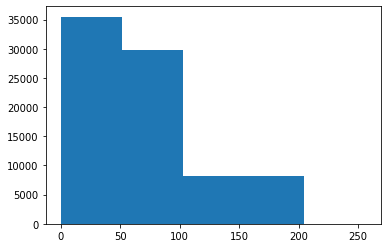

In [9]:
#CANALE ROSSO
#NUMERICAMENTE
hist_r = cv2.calcHist([img],[0],None,[5],[0,256])
#GRAFICAMENTE
plt.hist(img[:,:,:1].ravel(),5,[0,256]); plt.show()

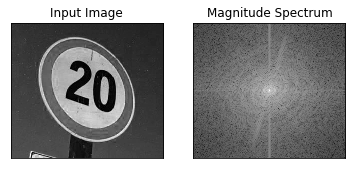

In [10]:
#SPETTRO CANALE ROSSO
f = np.fft.fft2(img[:,:,0])
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img[:,:,0], cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

# Clustering

In [11]:
X = df_c[df_c.columns[5:]].to_numpy() #prendo tutte le features numeriche raccolte

In [12]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
clustering = DBSCAN(eps= 50000, min_samples = 5, algorithm='brute').fit(X) #eps=50000, min_samples=5
print(clustering.labels_, clustering)

[ 0  1 -1  2  2  3  4  3  3  3  2  4 -1  3 -1  3  4  4  5  3  4  3  3  3
  4  3  0  0  2  5 -1  6  4  3  2 -1  5  5  1  5  3  3  3  4  4  6  4  4
  4  3  4  3  3  4  4  3  4  5  4  3  5  4  3  4  2  3  4  3  4  5  3 -1
  0  3  4  3  5  4  3  3  5  3  3  3  4  1  6  3  2  4  3  3  3  5  3  3
  4  4  5  3  3  4  5  5  0  4  4  4  4  1  4  1  1  4  0  1  1  4  0  4
  1 -1  6  3  1  1  0  3  5  2  3  1  3  3  3  3  1  1  6  3  4  3  5  3
  3  4  2  3  3  6  3  2  3  3  3] DBSCAN(algorithm='brute', eps=50000, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)


In [13]:
metrics.silhouette_score(X, clustering.labels_, metric='euclidean')

0.8056935450321261

In [14]:
from sklearn.cluster import KMeans
clustering = KMeans(n_clusters=8, random_state = 91022).fit(X) #eps=50000, min_samples=5
print(clustering.labels_, clustering)

[6 4 0 5 5 7 1 2 2 2 5 1 5 2 1 2 1 1 3 2 1 2 2 7 1 7 6 6 5 3 5 0 1 7 5 1 3
 3 4 3 7 2 7 1 1 0 1 1 1 7 1 7 2 1 1 2 1 3 1 2 3 1 2 1 5 2 1 7 1 3 2 5 6 2
 1 2 3 1 2 2 3 2 2 7 1 4 0 2 5 1 2 7 2 3 7 2 1 1 3 2 2 1 3 3 6 1 1 1 1 4 1
 4 4 1 6 4 4 1 6 1 4 5 0 7 4 4 6 2 3 5 2 4 7 7 2 2 4 4 0 7 1 2 3 2 2 1 5 2
 2 0 2 5 2 2 2] KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=91022, tol=0.0001, verbose=0)


In [15]:
metrics.silhouette_score(X, clustering.labels_, metric='euclidean')

0.8241705665969823

In [16]:
df_c['clustering_labels'] = pd.Series(clustering.labels_)

# Visualizzo i risultati

In [17]:
import seaborn as sns

### - rispetto alle condizioni di luce (giorno/notte)

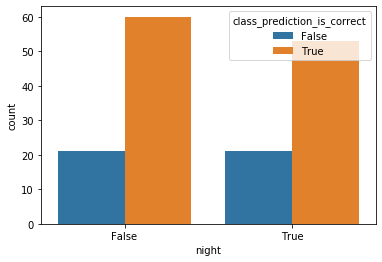

In [18]:
sns.countplot(x='night', hue="class_prediction_is_correct", data=df_c)

La rete sembra essere robusta al cambiamento giorno/notte.

In [33]:
104/2

52.0

### - rispetto al clustering

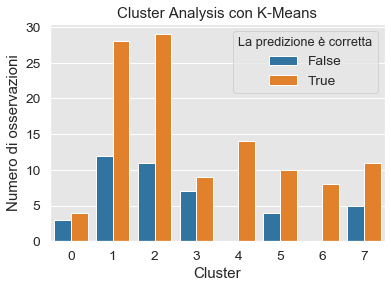

In [29]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("notebook", font_scale=1.25)
g = sns.countplot(x='clustering_labels', hue="class_prediction_is_correct", data=df_c)
g.set_title('Cluster Analysis con K-Means')
g.set(xlabel='Cluster', ylabel='Numero di osservazioni')
leg = g.get_legend()
new_title = 'La predizione è corretta'
leg.set_title(new_title)
plt.savefig('Presentazione/clusters.png')

Non sembrano esserci cluster in cui è particolarmente evidente un dislivello tra le immagini correttamente e incorrettamente predette. 

### - rispetto alla classe di appartenenza 

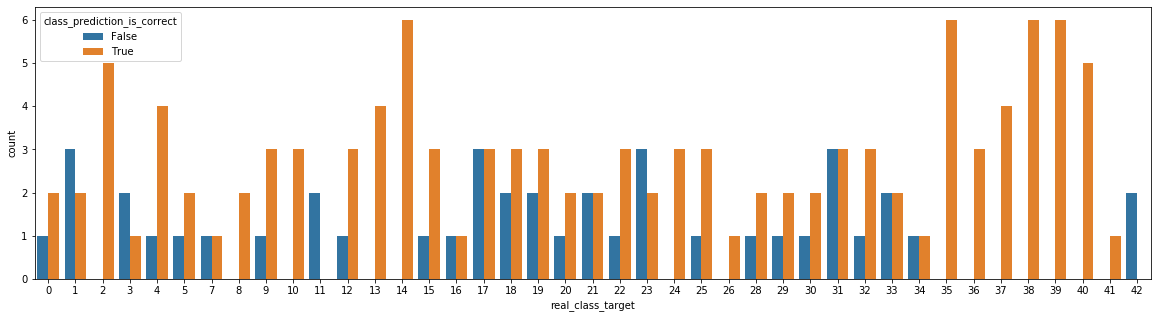

In [20]:
plt.figure(figsize=(20,5))
sns.countplot(x='real_class_target', hue="class_prediction_is_correct", data=df_c)

Le seguenti classi sono state predette sempre male:
- 11 ()
- 42 (divieto sorpasso autocarri)

Invece questi segnali sono stati sempre predetti correttamente:
- 2 ()
- 8 ()
- 10 ()
- 13 (dare precedenza)
- 14 ()
- 24 ()
- 35....41

# Attivazioni dei layer

https://github.com/gabrielpierobon/cnnshapes/blob/master/README.md

In [23]:
img = io.imread(r"C:\Users\Giobi\OneDrive - Universita degli Studi di Milano-Bicocca\Digital Signal and Image Management\Progetto Segnali Stradali\dataset_classificazione_multiclasse_creato_da_noi\40 - rotatoria\notte2.jpg")    

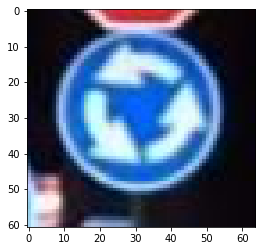

In [24]:
plt.imshow(img)

In [25]:
def show_activations(img, n_layers = 12):
    
    img = cv2.resize(img, (40, 40), interpolation=cv2.INTER_CUBIC)
    img = np.expand_dims(img/255, axis = 0)
    
    layer_outputs = [layer.output for layer in multi_task.layers[:n_layers]] 
    activation_model = models.Model(inputs= multi_task.input, outputs=layer_outputs[1:])
    activations = activation_model.predict(img)
    layer_names = []
    for layer in multi_task.layers[1:n_layers]:
        layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot

    images_per_row = 16

    for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
        n_features = layer_activation.shape[-1] # Number of features in the feature map
        size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
        n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols): # Tiles each filter into a big horizontal grid
            for row in range(images_per_row):
                channel_image = layer_activation[0,
                                                 :, :,
                                                 col * images_per_row + row]
                channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size, # Displays the grid
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

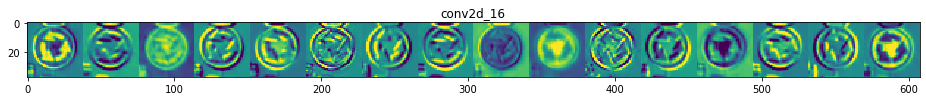

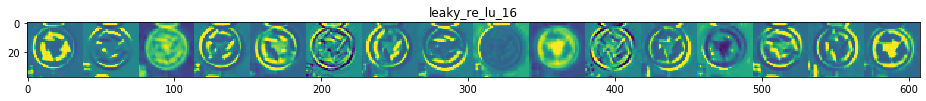

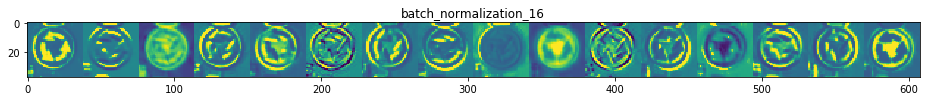

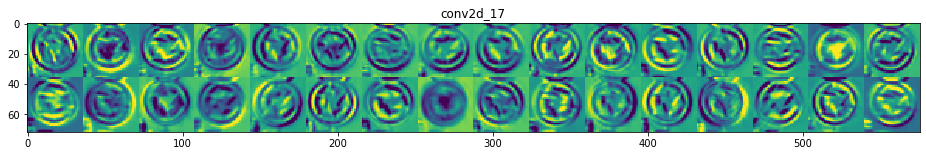

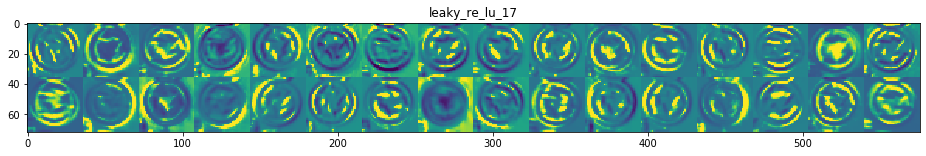

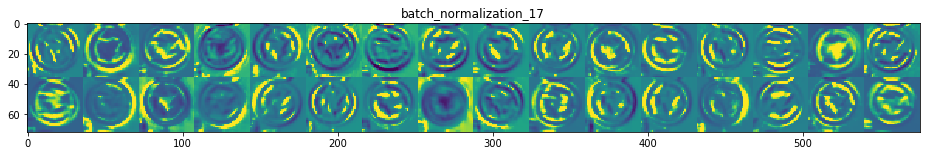

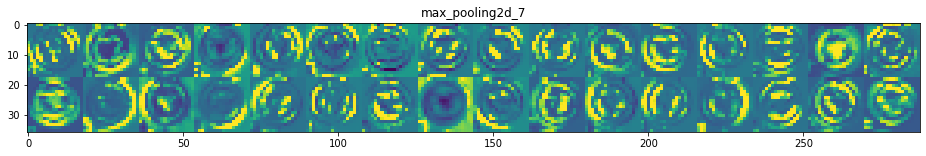

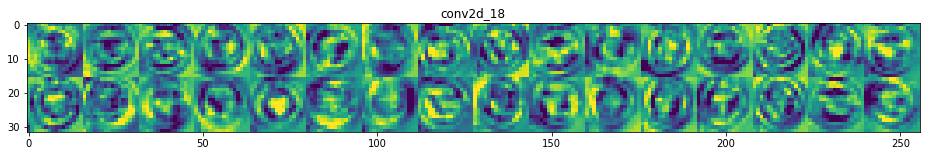

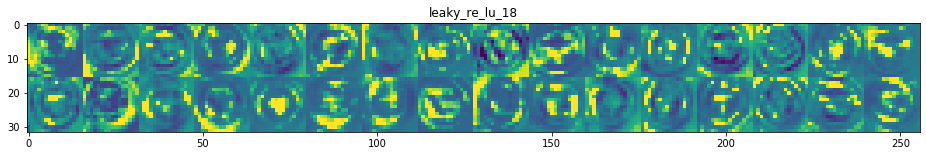

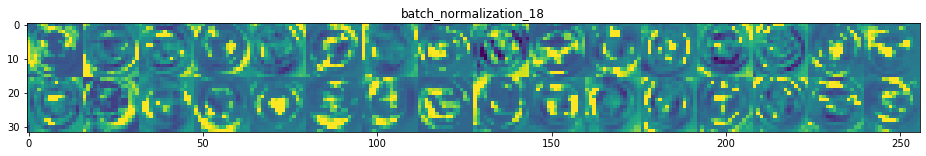

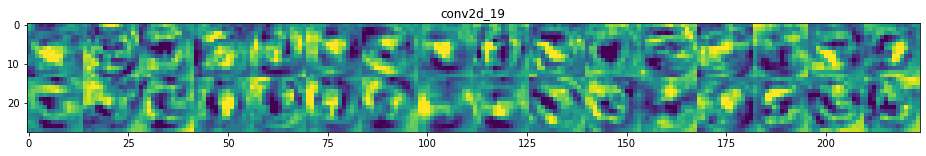

In [26]:
show_activations(img, n_layers = 12)

### Provo su un'immagine che non riesce a prevedere correttamente

In [28]:
new_img = io.imread(r"C:\Users\Giobi\OneDrive - Universita degli Studi di Milano-Bicocca\Digital Signal and Image Management\Progetto Segnali Stradali\dataset_classificazione_multiclasse_creato_da_noi\11 - inserzione_diritto_di_precedenza\100_1607.jpg")    

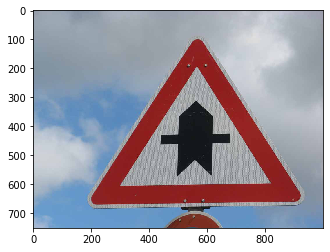

In [29]:
plt.imshow(new_img)

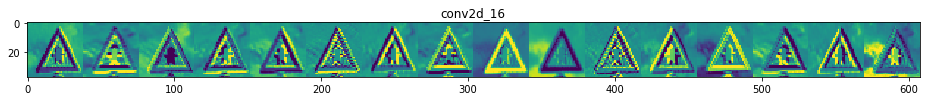

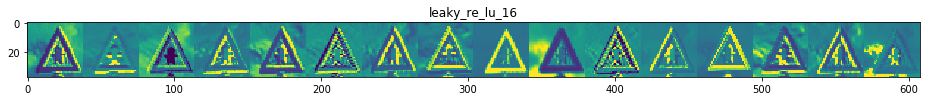

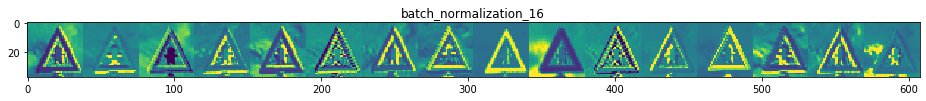

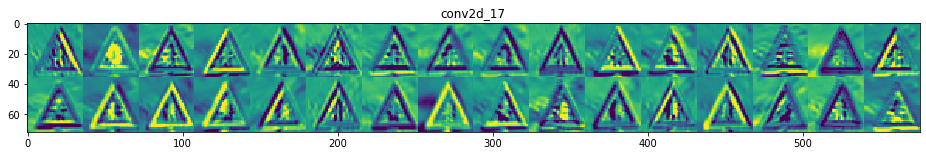

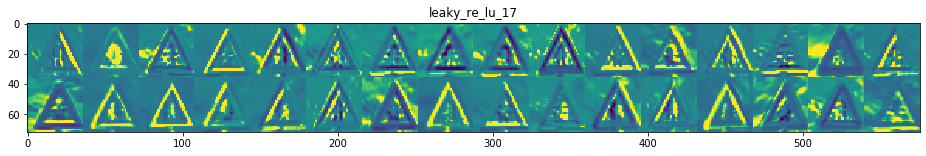

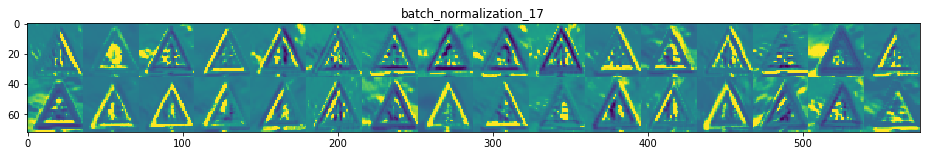

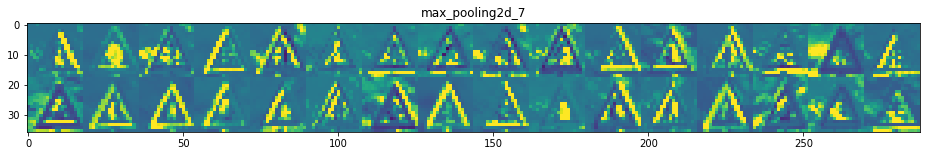

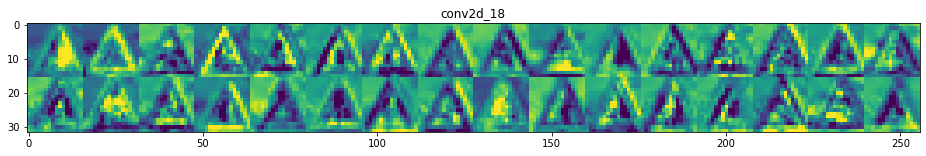

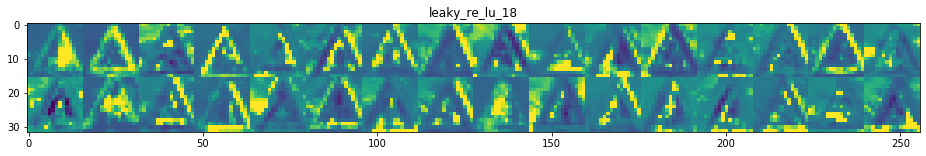

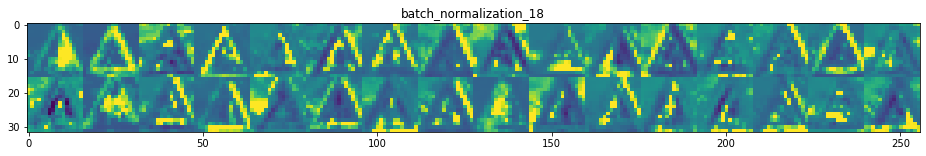

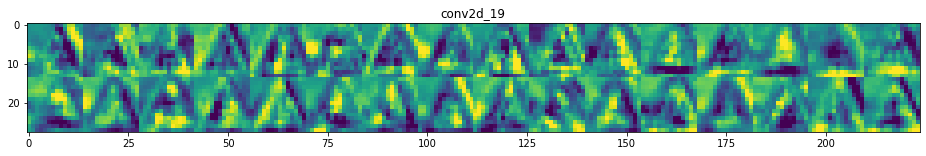

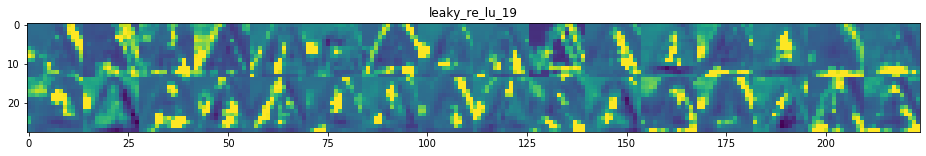

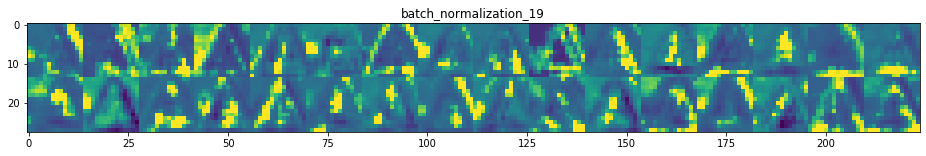

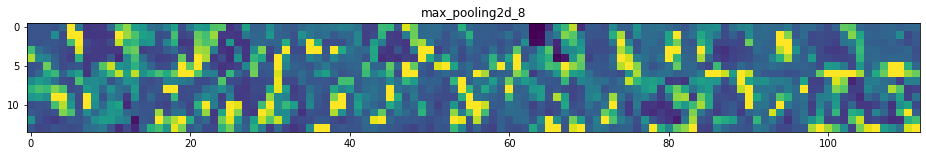

In [30]:
show_activations(new_img, n_layers = 15)